# Perkenalan

Nama/Batch : Sandika akbar/008



# Import Pustaka

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sy
import matplotlib.image as mpimg

# Data Loading

In [ ]:
!wget https://cdn.cnn.com/cnnnext/dam/assets/201030094143-stock-rhodesian-ridgeback-exlarge-169.jpg

--2022-02-01 06:03:19--  https://cdn.cnn.com/cnnnext/dam/assets/201030094143-stock-rhodesian-ridgeback-exlarge-169.jpg
Resolving cdn.cnn.com (cdn.cnn.com)... 23.1.44.109, 2600:1408:c400:1080::3134, 2600:1408:c400:108b::3134
Connecting to cdn.cnn.com (cdn.cnn.com)|23.1.44.109|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55944 (55K) [image/jpeg]
Saving to: ‘201030094143-stock-rhodesian-ridgeback-exlarge-169.jpg’

201030094143-stock- 100%[===================>]  54.63K  --.-KB/s    in 0.001s  

2022-02-01 06:03:19 (37.4 MB/s) - ‘201030094143-stock-rhodesian-ridgeback-exlarge-169.jpg’ saved [55944/55944]



command yang digunakan untuk mengambil gambar dari website

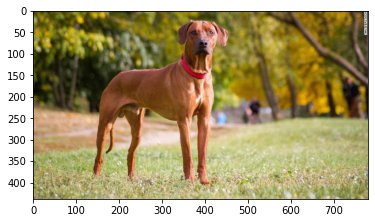

In [ ]:
image = plt.imread('201030094143-stock-rhodesian-ridgeback-exlarge-169.jpg')
plt.imshow(image)

In [ ]:
image.shape

(438, 780, 3)

Command image.shape digunakan untuk mengetahui ukuran matriks gambar dimana 438 780 adalah ukuran gambar dan 3 nya menunjukkan spektrum warna yang digunakan digambar (Red, Green, Blue)

# Proses Data

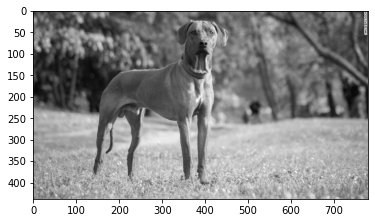

In [ ]:
R, G, B = image[:,:,0], image[:,:,1], image[:,:,2]
ig = 0.2989 * R + 0.5870 * G + 0.1140 * B
plt.imshow(ig, cmap='gray')
plt.show()


proses pemfilteran warna ini digunakan untuk mengubah gambar menjadi grayscale untuk mempermudah edge detection, rumus didapat dari google 

In [ ]:
ig= np.array(ig)

proses pengubahan gambar grayscale menjadi array

In [ ]:
ig.shape

(438, 780)

# Proses Gambar

In [ ]:
gradien_x, gradien_y = np.gradient(ig)

In [ ]:
gradien_y

array([[  0.5978 ,  -1.07305,  -2.6299 , ...,  -1.60535,   5.32845,
         12.9987 ],
       [  0.     ,  -0.42905,  -0.83115, ...,   5.8369 ,  -4.67055,
        -27.1113 ],
       [  0.4838 ,   0.4268 ,   0.6633 , ...,  -3.1622 ,   6.0703 ,
         24.0084 ],
       ...,
       [ -6.4724 ,  -7.9368 ,  -9.37965, ...,   1.2364 ,  -2.49975,
         -3.9996 ],
       [ -6.9993 ,  -8.37975,  -8.37975, ...,   0.38595,  -3.61365,
         -4.9995 ],
       [ -6.9993 ,  -8.9991 ,  -8.8797 , ...,  -0.32045,  -4.9995 ,
         -6.9993 ]])

In [ ]:
gradien_x

array([[ -8.9991 ,  -9.5969 ,  -7.7111 , ...,  -1.9998 ,  18.1122 ,
        -21.9978 ],
       [-10.2409 , -10.2979 ,  -8.74105, ...,   3.8201 ,  -0.9429 ,
          4.56195],
       [ -8.74105,  -8.9991 ,  -7.8852 , ..., 107.22805, -13.8846 ,
         20.1744 ],
       ...,
       [ -0.73645,  -2.2417 ,  -2.67925, ...,   1.9913 ,   1.37735,
          0.8774 ],
       [ -0.62245,  -0.8859 ,  -1.68475, ...,   4.991  ,   3.9911 ,
          2.49125],
       [  0.228  ,   0.228  ,  -1.0107 , ...,   5.2275 ,   4.4556 ,
          2.4558 ]])

(-0.5, 779.5, 437.5, -0.5)

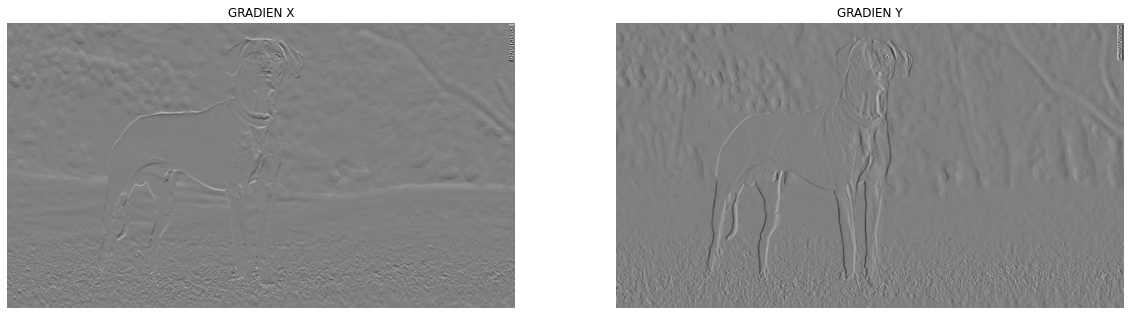

In [ ]:

fig = plt.figure(figsize=(20,10))
row = 1
col = 2

fig.add_subplot(row, col, 1)
plt.imshow(gradien_x, cmap='gray')
plt.title('GRADIEN X')
plt.axis('off')

fig.add_subplot(row, col, 2)
plt.imshow(gradien_y, cmap='gray')
plt.title('GRADIEN Y')
plt.axis('off')

proses penurunan gradien berdasarkan sumbu x dan sumbu y

In [ ]:
magnitude = np.sqrt(grad_x**2 + grad_y**2)
magnitude


array([[  9.01893373,   9.65670368,   8.14723494, ...,   2.56443925,
         18.87972903,  25.55130929],
       [ 10.2409    ,  10.30683406,   8.78047638, ...,   6.97585591,
          4.76477677,  27.49243488],
       [  8.75442845,   9.00921523,   7.91304909, ..., 107.27466717,
         15.15356919,  31.35936361],
       ...,
       [  6.51416306,   8.24730339,   9.7548047 , ...,   2.34391993,
          2.85409234,   4.09470767],
       [  7.02692283,   8.42644818,   8.54743193, ...,   5.00590036,
          5.38398974,   5.58581479],
       [  7.00301253,   9.00198783,   8.93703455, ...,   5.23731271,
          6.69681802,   7.41762456]])

proses menghitung gradien magnitude tiap pixel

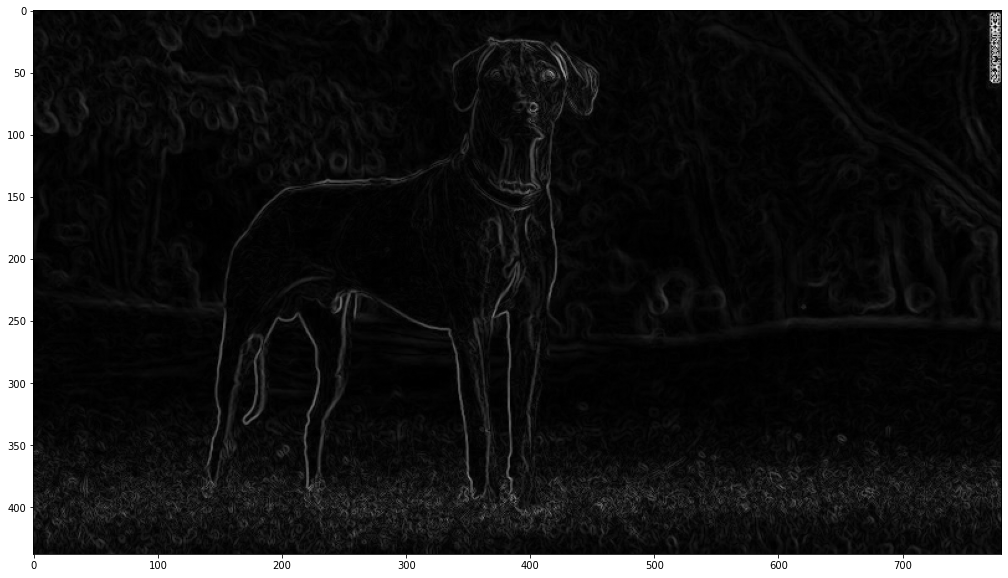

In [ ]:
fig = plt.figure(figsize=(20,10))
plt.imshow(magnitude, cmap='gray')

hasil dari pemrosesan gambar magnitude untuk memunculkan edge

In [ ]:
np.count_nonzero(magnitude>30)


9090

terdapat 9090 data magnitudo yang lebih besar dari 30

In [ ]:
np.max(magnitude)

179.79092691137112

In [ ]:
t30_putih = np.where(mag>30, mag, 179.79092691137112)
t30_putih

array([[179.79092691, 179.79092691, 179.79092691, ..., 179.79092691,
        179.79092691, 179.79092691],
       [179.79092691, 179.79092691, 179.79092691, ..., 179.79092691,
        179.79092691, 179.79092691],
       [179.79092691, 179.79092691, 179.79092691, ..., 107.27466717,
        179.79092691,  31.35936361],
       ...,
       [179.79092691, 179.79092691, 179.79092691, ..., 179.79092691,
        179.79092691, 179.79092691],
       [179.79092691, 179.79092691, 179.79092691, ..., 179.79092691,
        179.79092691, 179.79092691],
       [179.79092691, 179.79092691, 179.79092691, ..., 179.79092691,
        179.79092691, 179.79092691]])

In [ ]:
t15 = np.where(mag>15, mag, 179.79092691137112)
t15

array([[179.79092691, 179.79092691, 179.79092691, ..., 179.79092691,
         18.87972903,  25.55130929],
       [179.79092691, 179.79092691, 179.79092691, ..., 179.79092691,
        179.79092691,  27.49243488],
       [179.79092691, 179.79092691, 179.79092691, ..., 107.27466717,
         15.15356919,  31.35936361],
       ...,
       [179.79092691, 179.79092691, 179.79092691, ..., 179.79092691,
        179.79092691, 179.79092691],
       [179.79092691, 179.79092691, 179.79092691, ..., 179.79092691,
        179.79092691, 179.79092691],
       [179.79092691, 179.79092691, 179.79092691, ..., 179.79092691,
        179.79092691, 179.79092691]])

In [ ]:
t50 = np.where(mag>50, mag, 179.79092691137112)
t50

array([[179.79092691, 179.79092691, 179.79092691, ..., 179.79092691,
        179.79092691, 179.79092691],
       [179.79092691, 179.79092691, 179.79092691, ..., 179.79092691,
        179.79092691, 179.79092691],
       [179.79092691, 179.79092691, 179.79092691, ..., 107.27466717,
        179.79092691, 179.79092691],
       ...,
       [179.79092691, 179.79092691, 179.79092691, ..., 179.79092691,
        179.79092691, 179.79092691],
       [179.79092691, 179.79092691, 179.79092691, ..., 179.79092691,
        179.79092691, 179.79092691],
       [179.79092691, 179.79092691, 179.79092691, ..., 179.79092691,
        179.79092691, 179.79092691]])

In [ ]:
t75 = np.where(mag>75, mag, 255)
t75

array([[255.        , 255.        , 255.        , ..., 255.        ,
        255.        , 255.        ],
       [255.        , 255.        , 255.        , ..., 255.        ,
        255.        , 255.        ],
       [255.        , 255.        , 255.        , ..., 107.27466717,
        255.        , 255.        ],
       ...,
       [255.        , 255.        , 255.        , ..., 255.        ,
        255.        , 255.        ],
       [255.        , 255.        , 255.        , ..., 255.        ,
        255.        , 255.        ],
       [255.        , 255.        , 255.        , ..., 255.        ,
        255.        , 255.        ]])

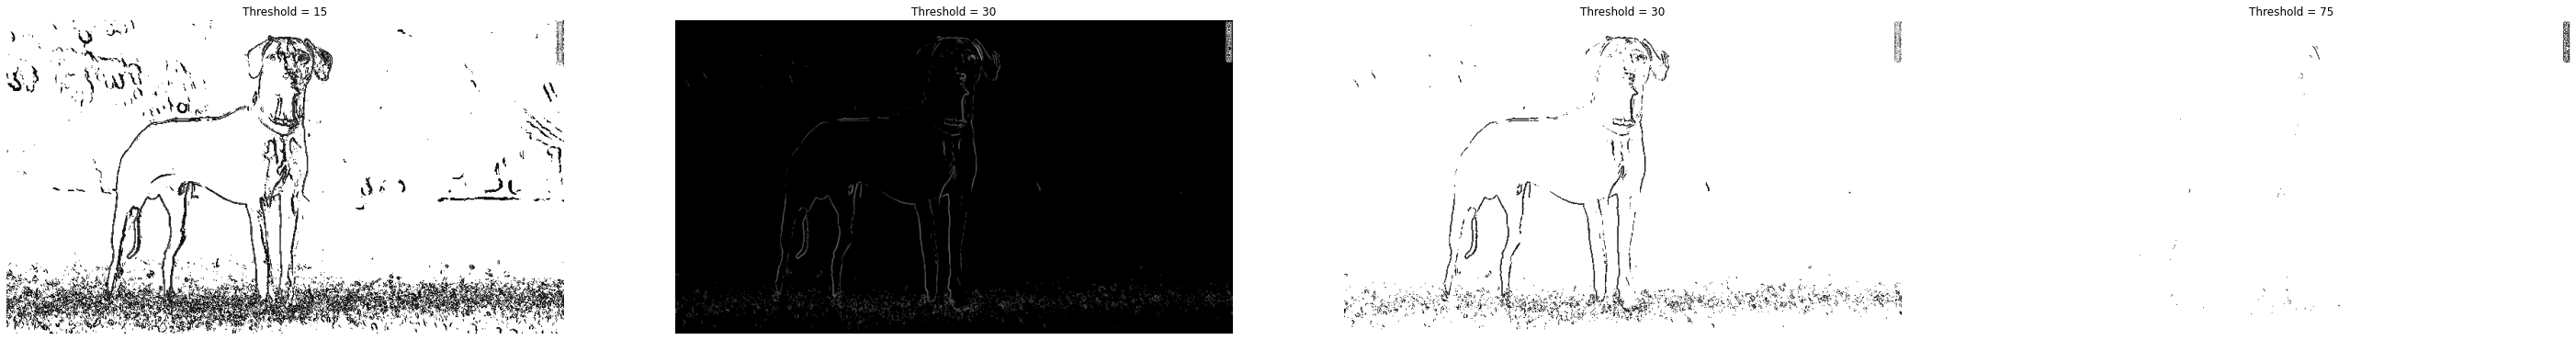

In [ ]:
fig = plt.figure(figsize=(50,25))
row = 1
col = 4

fig.add_subplot(row, col, 2)
plt.imshow(t30, cmap = 'gray')
plt.title('Threshold = 30')
plt.axis('off')

fig.add_subplot(row, col, 1)
plt.imshow(t15, cmap = 'gray')
plt.title('Threshold = 15')
plt.axis('off')

fig.add_subplot(row,  col, 4)
plt.imshow(t75, cmap = 'gray')
plt.title('Threshold = 75')
plt.axis('off')


fig.add_subplot(row, col, 3)
plt.imshow(t30_putih, cmap = 'gray')
plt.title('Threshold = 30')
plt.axis('off')

plt.show()

# Kesimpulan

Semakin besar angka threshold semakin sedikit juga edge gambar yang terdeteksi 

- threshold 15 = edge background masih terlihat
- threshold 30 = edge background tidak terlihat
- threshold 75 = tidak ada edge yang terlihat sama sekali

# Perkalian Matriks

In [ ]:
random=np.random.rand(780,438)

Pembuatan matriks random

In [ ]:
perkalian = t30 @ random
perkalian

array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [347.14746152, 285.70099527, 292.26522666, ..., 257.18272716,
        337.98576315, 302.22699154],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [ ]:
perkalian.shape

(438, 438)

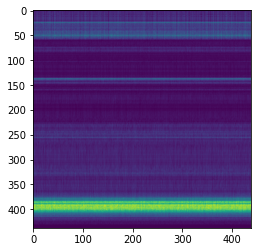

In [ ]:
plt.imshow(perkalian)